In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
from green_concrete.convert import *
import matplotlib.transforms as transforms
%matplotlib inline

plt.__file__

colorhash = ['#0076BD', '#5FA845', '#FFBA49', '#9A52F5', '#CC3732']

## Template

In [21]:
# rundir = os.getcwd()

# filename = '.csv'
# inloc = os.path.join(rundir, 'outputs\\keep', filename)
# outloc = os.path.join(rundir, 'outputs\\plots')

# f = pd.read_csv(inloc)
# f.drop('Unnamed: 0', axis=1, inplace=True)

# cols = ['Unnamed: 2', 'Unnamed: 4']
# data = {}

# # Set the width of the bars
# bar_width = 0.35

# group_labels = []
# colorhash = ['#0076BD', '#5FA845', '#FFBA49', '#976AF5']

# # Create an array for the x-axis positions of the bars
# x = np.arange(len(group_labels))

# fix, ax = plt.subplots()
# ax2 = ax.twinx()

# # Add labels and title with adjusted font size
# plt.ylabel('Levilized Cost of Cement\n($/ton cement)', fontsize=18)
# plt.title('', fontsize=18)
# plt.xticks(x, group_labels, fontsize=18)
# plt.yticks(fontsize=14)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=16)

# # Loop through each group of bars and create a set of bars for each group
# for i, (group, values) in enumerate(data.items()):
#    # Calculate the x-axis position for the current group of bars
#    pos = x + (i * bar_width)
#    # Create a set of bars for the current group
#    ax.bar(pos, values, width=bar_width, label=group)

# plt.ylim(0, 100)

# plt.tight_layout()

# # Save the plot
# plt.savefig(os.path.join(outloc, '.png'), dpi=600)
# # Show the plot

# plt.show()

**Graphs for SULI Research Paper and Poster Presentation** 

*Evan Sharafuddin*

## Comparison with CEMCAP
### Import Data

In [22]:
rundir = os.getcwd()

filename = 'CEMENT_BATCH_cemcap_compare_IA_31-07-2023_11.32.10.csv'
inloc = os.path.join(rundir, 'outputs\\keep', filename)
outloc = os.path.join(rundir, 'outputs\\plots')

f = pd.read_csv(inloc)
f.drop('Unnamed: 0', axis=1, inplace=True)

cols = ['Unnamed: 2', 'Unnamed: 4']
data = f[cols]
my_model_cost = [round(n) for n in f['Unnamed: 2'].values]
my_model_emissions = [round(n) for n in f['Unnamed: 4'].values]

# source for the following: CEMCAP d4.6
cemcap_cost = [round(n) for n in eur2014(1, *[46, 68.4, 77.8])]
cemcap_emissions = [round(n) for n in [
                        850 * .737, # kg/t cli * cli/cem
                        (110-99) * (8760/1e6) * .737 * 1e3, # middle: t/h * h/t cli * cli/cem * kg/t = kg co2/t cem
                        79.1 * .737, # kg/t cli * cli/cem
                    ]] 

### Costs

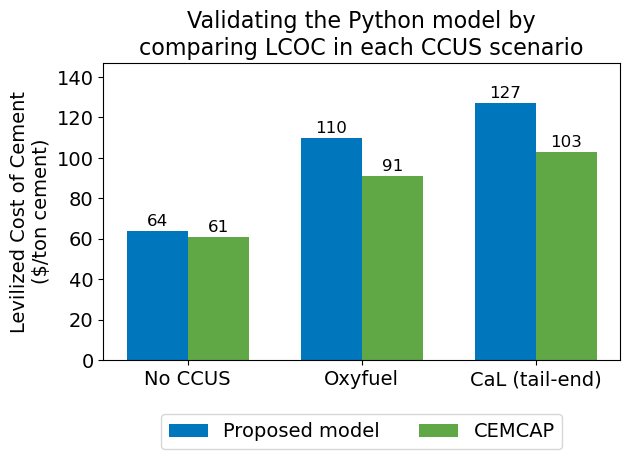

In [23]:
### Costs

# Set the width of the bars
bar_width = 0.35
# figure(figsize=(4, 3), dpi=600)
group_labels = ['No CCUS', 'Oxyfuel', 'CaL (tail-end)']

# Create an array for the x-axis positions of the bars
x = np.arange(len(group_labels))

# Create the bar plot with two adjacent columns for each group
plt.bar(x - bar_width/2, my_model_cost, width=bar_width, label='Proposed model', color=colorhash[0])
plt.bar(x + bar_width/2, cemcap_cost, width=bar_width, label='CEMCAP', color=colorhash[1])

# Add labels and title with adjusted font size
plt.ylabel('Levilized Cost of Cement\n($/ton cement)', fontsize=14)
plt.title('Validating the Python model by\ncomparing LCOC in each CCUS scenario', fontsize=16)
plt.xticks(x, group_labels, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=14)

for i, v1, v2 in zip(x, my_model_cost, cemcap_cost):
    plt.text(i - bar_width/2, v1 + 1, str(v1), ha='center', va='bottom', color='black', fontsize=12)
    plt.text(i + bar_width/2, v2 + 1, str(v2), ha='center', va='bottom', color='black', fontsize=12)

plt.ylim(top=max(max(my_model_cost), max(cemcap_cost)) + 20)

plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(outloc, 'cemcap_comparison_cost.png'), dpi=600, bbox_inches='tight')
# Show the plot

plt.show()



### Emissions

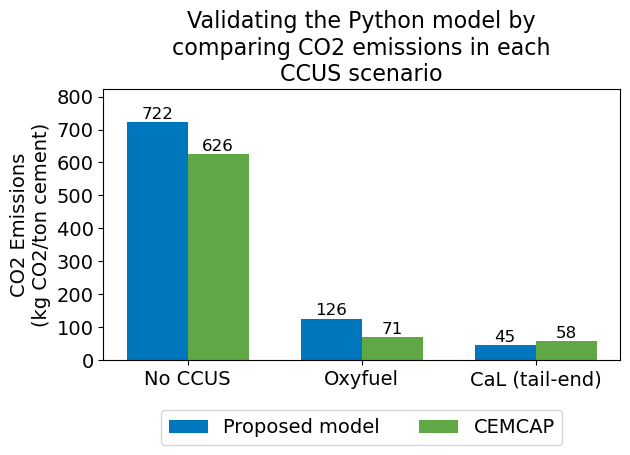

In [24]:
# Set the width of the bars
bar_width = 0.35
# figure(figsize=(4, 3), dpi=600)
group_labels = ['No CCUS', 'Oxyfuel', 'CaL (tail-end)']

# Create an array for the x-axis positions of the bars
x = np.arange(len(group_labels))

# Create the bar plot with two adjacent columns for each group
plt.bar(x - bar_width/2, my_model_emissions, width=bar_width, label='Proposed model', color=colorhash[0])
plt.bar(x + bar_width/2, cemcap_emissions, width=bar_width, label='CEMCAP', color=colorhash[1])

# Add labels and title
plt.ylabel('CO2 Emissions\n(kg CO2/ton cement)', fontsize=14)
plt.title('Validating the Python model by\ncomparing CO2 emissions in each\nCCUS scenario', fontsize=16)
plt.xticks(x, group_labels, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=14)

for i, v1, v2 in zip(x, my_model_emissions, cemcap_emissions):
    plt.text(i - bar_width/2, v1 + 1, str(v1), ha='center', va='bottom', color='black', fontsize=12)
    plt.text(i + bar_width/2, v2 + 1, str(v2), ha='center', va='bottom', color='black', fontsize=12)

plt.ylim(top=max(max(my_model_emissions), max(cemcap_emissions)) + 100)
plt.tight_layout()

plt.savefig(os.path.join(outloc, 'cemcap_comparison_emissions.png'), dpi=600, bbox_inches='tight')
# Show the plot
plt.show()


## Substituting coal and petcoke with natural gas

### grid-only

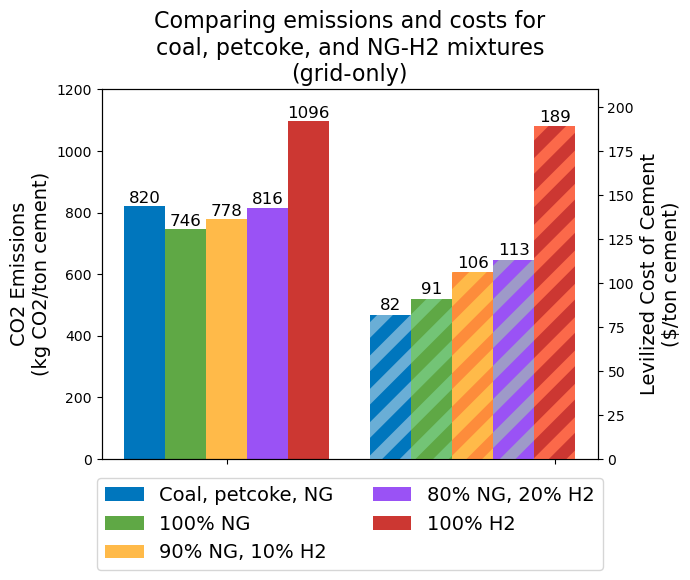

In [25]:
rundir = os.getcwd()

filename = 'CEMENT_BATCH_fuel_mix_grid-only_03-08-2023_09.03.55.csv'
inloc = os.path.join(rundir, 'outputs\\keep', filename)
outloc = os.path.join(rundir, 'outputs\\plots')

f = pd.read_csv(inloc)
f.drop('Unnamed: 0', axis=1, inplace=True)

cols = ['Unnamed: 2', 'Unnamed: 4']
data = f[cols]
cost = [round(n) for n in f['Unnamed: 2'].values]
emissions = [round(n) for n in f['Unnamed: 4'].values]

# Set the width of the bars
bar_width = 0.25
# figure(figsize=(4, 3), dpi=600)
group_labels = ['Coal, petcoke, NG', '100% NG', '90% NG, 10% H2', '80% NG, 20% H2', '100% H2']


# Create an array for the x-axis positions of the bars
x = np.arange(len(group_labels))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.set_ylim(0, 1200)
ax2.set_ylim(0, 210)

ax1.bar(0 - 4 * bar_width/2, emissions[0], width=bar_width, label=group_labels[0], color=colorhash[0])
ax1.bar(0 - 2 * bar_width/2, emissions[1], width=bar_width, label=group_labels[1], color=colorhash[1])
ax1.bar(0, emissions[2], width=bar_width, label=group_labels[2], color=colorhash[2])
ax1.bar(0 + 2 * bar_width/2, emissions[3], width=bar_width, label=group_labels[3], color=colorhash[3])
ax1.bar(0 + 4 * bar_width/2, emissions[4], width=bar_width, label=group_labels[4], color=colorhash[4])

plt.rcParams['hatch.linewidth'] = 8
cmap = plt.get_cmap('Blues')
plt.rcParams['hatch.color'] = cmap(0.5)
ax2.bar(1.5 - 4 * bar_width/2, cost[0], width=bar_width, label=group_labels[0], color=colorhash[0], hatch='/')
cmap = plt.get_cmap('Greens')
plt.rcParams['hatch.color'] = cmap(0.5)
ax2.bar(1.5 - 2 * bar_width/2, cost[1], width=bar_width, label=group_labels[1], color=colorhash[1], hatch='/')
cmap = plt.get_cmap('Oranges')
plt.rcParams['hatch.color'] = cmap(0.5)
ax2.bar(1.5, cost[2], width=bar_width, label=group_labels[2], color=colorhash[2], hatch='/')
cmap = plt.get_cmap('Purples')
plt.rcParams['hatch.color'] = cmap(0.5)
ax2.bar(1.5 + 2 * bar_width/2, cost[3], width=bar_width, label=group_labels[3], color=colorhash[3], hatch='/')
cmap = plt.get_cmap('Reds')
plt.rcParams['hatch.color'] = cmap(0.5)
ax2.bar(1.5 + 4 * bar_width/2, cost[4], width=bar_width, label=group_labels[4], color=colorhash[4], hatch='/')

# Add labels and title
ax1.set_ylabel('CO2 Emissions\n(kg CO2/ton cement)', fontsize=14)
ax2.set_ylabel('Levilized Cost of Cement\n($/ton cement)', fontsize=14)
plt.title('Comparing emissions and costs for\ncoal, petcoke, and NG-H2 mixtures\n(grid-only)', fontsize=16)
plt.xticks([0,2], ['',''])
# plt.yticks(fontsize=14)

for v, i in zip(emissions, x):
    ax1.text(0 - 4*bar_width/2 + 2*(bar_width/2)*i, v + 1, str(v), ha='center', va='bottom', color='black', fontsize=12)

for v, i in zip(cost, x):
    ax2.text(1.5 - 4*bar_width/2 + 2*(bar_width/2)*i, v + 1, str(v), ha='center', va='bottom', color='black', fontsize=12)


ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.025), ncol=2, fontsize=14)

# ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=2, fontsize=16)
plt.savefig(os.path.join(outloc, 'fuel_switching_grid-only.png'), dpi=600, bbox_inches='tight')
# Show the plot
plt.show()







### off-grid 

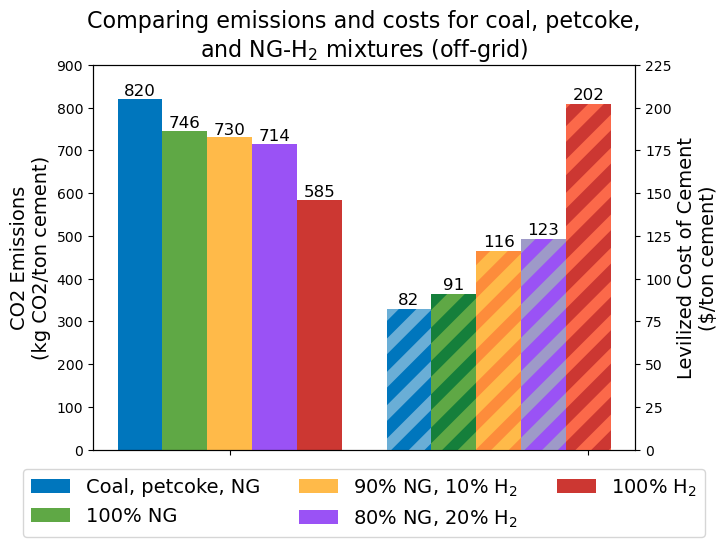

In [42]:
rundir = os.getcwd()

filename = 'CEMENT_BATCH_fuel_switch_off-grid_03-08-2023_09.32.40.csv'
inloc = os.path.join(rundir, 'outputs\\keep', filename)
outloc = os.path.join(rundir, 'outputs\\plots')

f = pd.read_csv(inloc)
f.drop('Unnamed: 0', axis=1, inplace=True)

cols = ['Unnamed: 2', 'Unnamed: 4']
data = f[cols]
cost = [round(n) for n in f['Unnamed: 2'].values]
emissions = [round(n) for n in f['Unnamed: 4'].values]

# Set the width of the bars
bar_width = 0.25
# figure(figsize=(4, 3), dpi=600)
group_labels = ['Coal, petcoke, NG', '100% NG', '90% NG, 10% H$_2$', '80% NG, 20% H$_2$', '100% H$_2$']


# Create an array for the x-axis positions of the bars
x = np.arange(len(group_labels))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.set_ylim(0, 900)
ax2.set_ylim(0, 225)

ax1.bar(0 - 4 * bar_width/2, emissions[0], width=bar_width, label=group_labels[0], color=colorhash[0])
ax1.bar(0 - 2 * bar_width/2, emissions[1], width=bar_width, label=group_labels[1], color=colorhash[1])
ax1.bar(0, emissions[2], width=bar_width, label=group_labels[2], color=colorhash[2])
ax1.bar(0 + 2 * bar_width/2, emissions[3], width=bar_width, label=group_labels[3], color=colorhash[3])
ax1.bar(0 + 4 * bar_width/2, emissions[4], width=bar_width, label=group_labels[4], color=colorhash[4])

plt.rcParams['hatch.linewidth'] = 8
cmap = plt.get_cmap('Blues')
plt.rcParams['hatch.color'] = cmap(0.5)
ax2.bar(1.5 - 4 * bar_width/2, cost[0], width=bar_width, label=group_labels[0], color=colorhash[0], hatch='/')
cmap = plt.get_cmap('Greens')
plt.rcParams['hatch.color'] = cmap(0.8)
ax2.bar(1.5 - 2 * bar_width/2, cost[1], width=bar_width, label=group_labels[1], color=colorhash[1], hatch='/')
cmap = plt.get_cmap('Oranges')
plt.rcParams['hatch.color'] = cmap(0.5)
ax2.bar(1.5, cost[2], width=bar_width, label=group_labels[2], color=colorhash[2], hatch='/')
cmap = plt.get_cmap('Purples')
plt.rcParams['hatch.color'] = cmap(0.5)
ax2.bar(1.5 + 2 * bar_width/2, cost[3], width=bar_width, label=group_labels[3], color=colorhash[3], hatch='/')
cmap = plt.get_cmap('Reds')
plt.rcParams['hatch.color'] = cmap(0.5)
ax2.bar(1.5 + 4 * bar_width/2, cost[4], width=bar_width, label=group_labels[4], color=colorhash[4], hatch='/')

# Add labels and title
ax1.set_ylabel('CO2 Emissions\n(kg CO2/ton cement)', fontsize=14)
ax2.set_ylabel('Levilized Cost of Cement\n($/ton cement)', fontsize=14)
plt.title('Comparing emissions and costs for coal, petcoke,\nand NG-H$_2$ mixtures (off-grid)', fontsize=16)
plt.xticks([0,2], ['',''])
# plt.yticks(fontsize=14)

for v, i in zip(emissions, x):
    ax1.text(0 - 4*bar_width/2 + 2*(bar_width/2)*i, v + 1, str(v), ha='center', va='bottom', color='black', fontsize=12)

for v, i in zip(cost, x):
    ax2.text(1.5 - 4*bar_width/2 + 2*(bar_width/2)*i, v + 1, str(v), ha='center', va='bottom', color='black', fontsize=12)


ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.025), ncol=3, fontsize=14)

# ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=2, fontsize=16)


fig.set_figwidth(7)
fig.set_figheight(5)
plt.savefig(os.path.join(outloc, 'fuel_switching_off-grid.png'), dpi=600, bbox_inches='tight')
# Show the plot
plt.show()


## NG-H2 with hybrid plant integration

[102, 116, 112, 123, 191, 202]
{'Cement only': [116, 123, 202], 'Cement and steel': [102, 112, 191]}


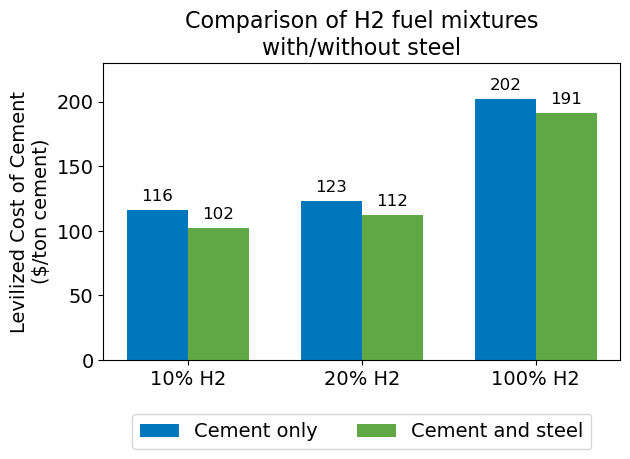

In [27]:
rundir = os.getcwd()

filename = 'CEMENT_BATCH_h2_ng_offgrid_pricecomp_31-07-2023_16.58.00.csv'
inloc = os.path.join(rundir, 'outputs\\keep', filename)
outloc = os.path.join(rundir, 'outputs\\plots')

f = pd.read_csv(inloc)
f.drop('Unnamed: 0', axis=1, inplace=True)

c = [round(n) for n in f['Unnamed: 2'].values]
e = [round(n) for n in f['Unnamed: 4'].values]

print(c)
data = {'Cement only': c[1::2],
        'Cement and steel': c[0:5:2],
}
print(data)
group_labels = ['10% H2', '20% H2', '100% H2']
colorhash1 = colorhash[:2]

# Set the width of the bars
bar_width = 0.35

# Create an array for the x-axis positions of the bars
x = np.arange(len(group_labels))

fix, ax = plt.subplots()
# ax2 = ax.twinx()

# Add labels and title with adjusted font size
plt.ylabel('Levilized Cost of Cement\n($/ton cement)', fontsize=14)
plt.title('Comparison of H2 fuel mixtures\nwith/without steel', fontsize=16)
plt.xticks(x, group_labels, fontsize=14)
plt.yticks(fontsize=14)


# Loop through each group of bars and create a set of bars for each group
for i, (group, values) in enumerate(data.items()):
# Calculate the x-axis position for the current group of bars
    pos = x + (i * bar_width)
    # Create a set of bars for the current group
    bars = ax.bar(pos, values, width=bar_width, label=group, color=colorhash1[i])

	# Add text labels above each bar
    for bar, value in zip(bars, values):
    	ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(value),
                ha='center', va='bottom', color='black', fontsize=12)

ax.set_xticks(x + ((len(data) - 1) / 2) * bar_width)
ax.set_xticklabels(group_labels)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=14)
plt.ylim(0, 230)

plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(outloc, 'fuel_comp_steel.png'), dpi=600, bbox_inches='tight')
# Show the plot

plt.show()

# TODO change this graph, make it like the one below

## Renewable electricity

### costs

[79, 82, 104, 110, 120, 120]
{'Grid elec.': [82, 110, 120], 'Hybrid plant elec.': [79, 104, 120]}


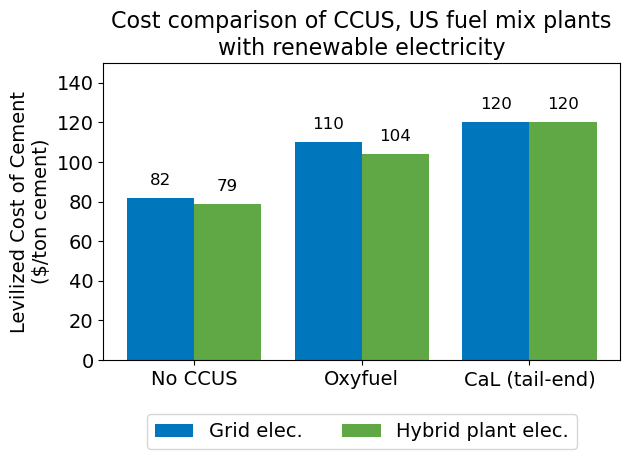

In [43]:
rundir = os.getcwd()

filename = 'CEMENT_BATCH_renewable_elec_postbug_03-08-2023_13.05.54.csv'
inloc = os.path.join(rundir, 'outputs\\keep', filename)
outloc = os.path.join(rundir, 'outputs\\plots')

f = pd.read_csv(inloc)
f.drop('Unnamed: 0', axis=1, inplace=True)

c = [round(n) for n in f['Unnamed: 2'].values]
e = [round(n) for n in f['Unnamed: 4'].values]

print(c)
data = {'Grid elec.': c[1::2],
        'Hybrid plant elec.': c[0::2],
}
print(data)
group_labels = ['No CCUS', 'Oxyfuel', 'CaL (tail-end)']


# Set the width of the bars
bar_width = 0.4

# Create an array for the x-axis positions of the bars
x = np.arange(len(group_labels))

fix, ax = plt.subplots()
# ax2 = ax.twinx()

# Add labels and title with adjusted font size
plt.ylabel('Levilized Cost of Cement\n($/ton cement)', fontsize=14)
plt.title('Cost comparison of CCUS, US fuel mix plants\nwith renewable electricity', fontsize=16)
plt.xticks(x, group_labels, fontsize=14)
plt.yticks(fontsize=14)


# Loop through each group of bars and create a set of bars for each group
for i, (group, values) in enumerate(data.items()):
# Calculate the x-axis position for the current group of bars
    pos = x + (i * bar_width)
    # Create a set of bars for the current group
    bars = ax.bar(pos, values, width=bar_width, label=group, color=colorhash[i])

	# Add text labels above each bar
    for bar, value in zip(bars, values):
    	ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(value),
                ha='center', va='bottom', color='black', fontsize=12)

ax.set_xticks(x + ((len(data) - 1) / 2) * bar_width)
ax.set_xticklabels(group_labels)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=14)
plt.ylim(0, 150)

plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(outloc, 'renewable_elec_cost_usfuel.png'), dpi=600, bbox_inches='tight')
# Show the plot

plt.show()

# NOTE CaL exhibits no change in costs/emissions because it produces electricity due to ORC

### emissions

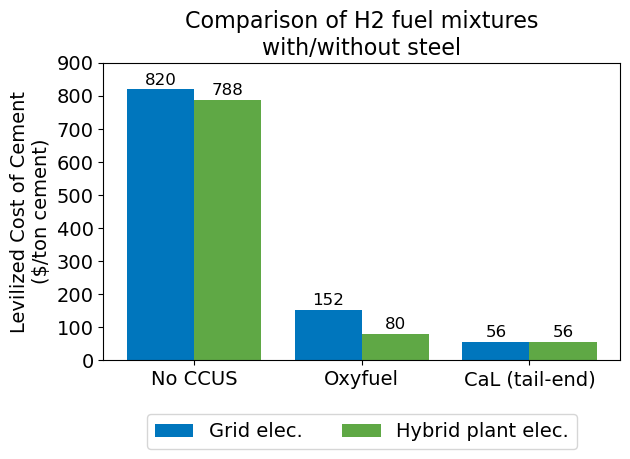

In [45]:
rundir = os.getcwd()

filename = 'CEMENT_BATCH_renewable_elec_postbug_03-08-2023_13.05.54.csv'
inloc = os.path.join(rundir, 'outputs\\keep', filename)
outloc = os.path.join(rundir, 'outputs\\plots')

f = pd.read_csv(inloc)
f.drop('Unnamed: 0', axis=1, inplace=True)

c = [round(n) for n in f['Unnamed: 2'].values]
e = [round(n) for n in f['Unnamed: 4'].values]


data = {'Grid elec.': e[1::2],
        'Hybrid plant elec.': e[0::2],
}

group_labels = ['No CCUS', 'Oxyfuel', 'CaL (tail-end)']


# Set the width of the bars
bar_width = 0.4

# Create an array for the x-axis positions of the bars
x = np.arange(len(group_labels))

fix, ax = plt.subplots()
# ax2 = ax.twinx()

# Add labels and title with adjusted font size
plt.ylabel('Levilized Cost of Cement\n($/ton cement)', fontsize=14)
plt.title('Comparison of H2 fuel mixtures\nwith/without steel', fontsize=16)
plt.xticks(x, group_labels, fontsize=14)
plt.yticks(fontsize=14)


# Loop through each group of bars and create a set of bars for each group
for i, (group, values) in enumerate(data.items()):
# Calculate the x-axis position for the current group of bars
    pos = x + (i * bar_width)
    # Create a set of bars for the current group
    bars = ax.bar(pos, values, width=bar_width, label=group, color=colorhash[i])

	# Add text labels above each bar
    for bar, value in zip(bars, values):
    	ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(value),
                ha='center', va='bottom', color='black', fontsize=12)

ax.set_xticks(x + ((len(data) - 1) / 2) * bar_width)
ax.set_xticklabels(group_labels)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=14)
plt.ylim(0, 900)

plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(outloc, '.png'), dpi=800)
# Show the plot

plt.show()


## CCUS with and without steel plant

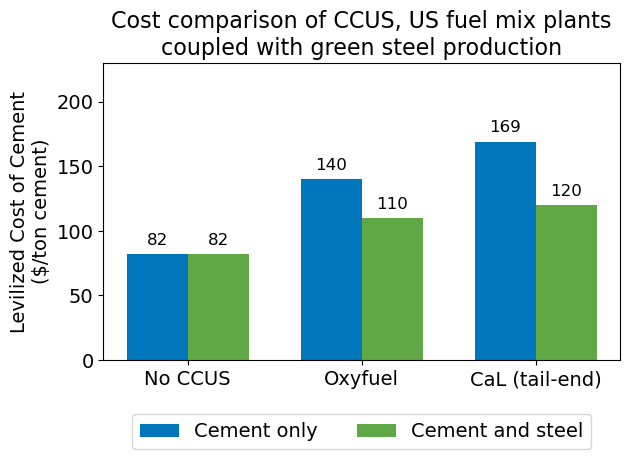

In [29]:
rundir = os.getcwd()

filename = 'CEMENT_BATCH_ccus_steel_31-07-2023_17.49.42.csv'
inloc = os.path.join(rundir, 'outputs\\keep', filename)
outloc = os.path.join(rundir, 'outputs\\plots')

f = pd.read_csv(inloc)
f.drop('Unnamed: 0', axis=1, inplace=True)

c = [round(n) for n in f['Unnamed: 2'].values]
e = [round(n) for n in f['Unnamed: 4'].values]


data = {'Cement only': c[1::2],
        'Cement and steel': c[0::2],
}

group_labels = ['No CCUS', 'Oxyfuel', 'CaL (tail-end)']

# Set the width of the bars
bar_width = 0.35

# Create an array for the x-axis positions of the bars
x = np.arange(len(group_labels))

fix, ax = plt.subplots()
# ax2 = ax.twinx()

# Add labels and title with adjusted font size
plt.ylabel('Levilized Cost of Cement\n($/ton cement)', fontsize=14)
plt.title('Cost comparison of CCUS, US fuel mix plants\ncoupled with green steel production', fontsize=16)
plt.xticks(x, group_labels, fontsize=14)
plt.yticks(fontsize=14)


# Loop through each group of bars and create a set of bars for each group
for i, (group, values) in enumerate(data.items()):
# Calculate the x-axis position for the current group of bars
    pos = x + (i * bar_width)
    # Create a set of bars for the current group
    bars = ax.bar(pos, values, width=bar_width, label=group, color=colorhash[i])

	# Add text labels above each bar
    for bar, value in zip(bars, values):
    	ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(value),
                ha='center', va='bottom', color='black', fontsize=12)

ax.set_xticks(x + ((len(data) - 1) / 2) * bar_width)
ax.set_xticklabels(group_labels)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=14)
plt.ylim(0, 230)

plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(outloc, 'green_steel_coupling.png'), dpi=600, bbox_inches='tight')
# Show the plot

plt.show()

# NOTE hybrid electricity is disabled TODO might want to enable hybrid electricity for the coupled cases?



## Policy

### import data

In [30]:
### import data
rundir = os.getcwd()

filename = 'CEMENT_BATCH_policy_big_batch_01-08-2023_17.12.33.csv'
inloc = os.path.join(rundir, 'outputs\\keep', filename)
outloc = os.path.join(rundir, 'outputs\\plots')

f = pd.read_csv(inloc)
f.drop('Unnamed: 0', axis=1, inplace=True)

c = f.iloc[:,:2]
c['Unnamed: 2'].apply(round)
f = f.iloc[:, 2:]
f['Unnamed: 4'].apply(round)

def filter_data(df, params):
    def check_substrings(s):
        return all(param in s for param in params)

    logic = df.iloc[:,0].apply(check_substrings)
    return df[logic][:]

def filter_data_not(df, params):
    def check_substrings(s):
        return not any(param in s for param in params)

    logic = df.iloc[:,0].apply(check_substrings)
    return df[logic][:]


### 2020, off-grid

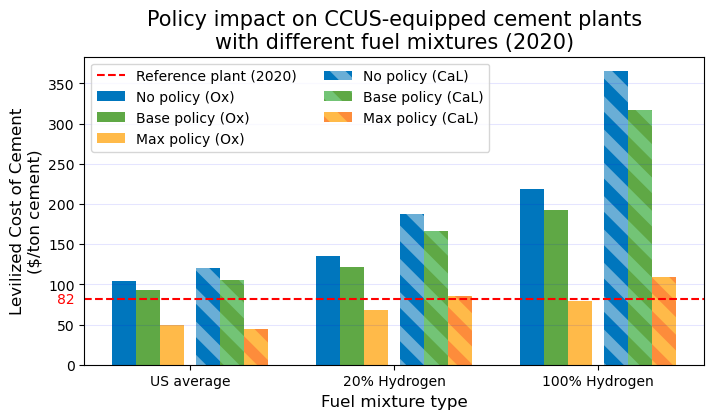

In [31]:
c_2020 = filter_data(c, ['2020'])
c_2020_grid = filter_data(c_2020, ['off-grid'])

c_US = filter_data_not(c_2020_grid, ['C4','C5'])
c_US_oxy = filter_data(c_US, ['Oxyfuel'])
c_US_cal = filter_data(c_US, ['CaL'])

c_C4 = filter_data(c_2020, ['off-grid','C4'])
c_C4_oxy = filter_data(c_C4, ['Oxyfuel'])
c_C4_cal = filter_data(c_C4, ['CaL'])

c_C5 = filter_data(c_2020, ['off-grid','C5'])
c_C5_oxy = filter_data(c_C5, ['Oxyfuel'])
c_C5_cal = filter_data(c_C5, ['CaL'])

# config graph
bar_width = 0.1
group_labels = ['US average', '20% Hydrogen', '100% Hydrogen']
group_space = 0.2
color_labels = ['No policy (Ox)', 'Base policy (Ox)', 'Max policy (Ox)', 'No policy (CaL)', 'Base policy (CaL)', 'Max policy (CaL)']

# Data for each subgroup in d1 (US average)
d1 = {
    "Oxyfuel": list(c_US_oxy['Unnamed: 2'].values[:3]),
    "CaL (tail-end)": list(c_US_cal['Unnamed: 2'].values[:3]),
}

# Data for each subgroup in d2 (C4)
d2 = {
    "Oxyfuel": list(c_C4_oxy['Unnamed: 2'].values[:3]),
    "CaL (tail-end)": list(c_C4_cal['Unnamed: 2'].values[:3]),
}

# Data for each subgroup in d3 (C5)
d3 = {
    "Oxyfuel": list(c_C5_oxy['Unnamed: 2'].values[:3]),
    "CaL (tail-end)": list(c_C5_cal['Unnamed: 2'].values[:3]),
}

x = np.arange(0, 4.5, 1.7)
width = 0.2
y1 = [round(d["Oxyfuel"][0]) for d in [d1, d2, d3]]
y2 = [round(d["Oxyfuel"][1]) for d in [d1, d2, d3]]
y3 = [round(d["Oxyfuel"][2]) for d in [d1, d2, d3]]
y4 = [round(d["CaL (tail-end)"][0]) for d in [d1, d2, d3]]
y5 = [round(d["CaL (tail-end)"][1]) for d in [d1, d2, d3]]
y6 = [round(d["CaL (tail-end)"][2]) for d in [d1, d2, d3]]

# begin plotting bars
fig, ax = plt.subplots()

bars = []
bars += ax.bar(x-0.55, y1, width, label=color_labels[0], color = colorhash[0])
bars += ax.bar(x-0.35, y2, width, label=color_labels[1], color = colorhash[1])
bars += ax.bar(x-0.15, y3, width, label=color_labels[2], color=colorhash[2])

plt.rcParams['hatch.linewidth'] = 8

cmap = plt.get_cmap('Blues')
plt.rcParams['hatch.color'] = cmap(0.5)
bars += ax.bar(x+0.15, y4, width, label=color_labels[3], color = colorhash[0], hatch='\\')
cmap = plt.get_cmap('Greens')
plt.rcParams['hatch.color'] = cmap(0.5)
bars += ax.bar(x+0.35, y5, width, label=color_labels[4], color = colorhash[1], hatch='\\')
cmap = plt.get_cmap('Oranges')
plt.rcParams['hatch.color'] = cmap(0.5)
bars += ax.bar(x+0.55, y6, width, label=color_labels[5], color = colorhash[2], hatch='\\')

ax.set_xticks(x, group_labels);
ax.set_xlabel('Fuel mixture type', fontsize=12)
ax.set_ylabel('Levilized Cost of Cement\n($/ton cement)', fontsize=12)



# add reference costs
ref_2020 = 81.85
ref_2030 = 84.19

plt.axhline(y=ref_2020, color='r', linestyle='--', label='Reference plant (2020)');
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,ref_2020, "{:.0f}".format(ref_2020), color="red", transform=trans, 
        ha="right", va="center")

plt.legend(ncol=2);
plt.grid(visible=True, which='major', axis='y', color='b', alpha=0.1)
plt.title('Policy impact on CCUS-equipped cement plants\nwith different fuel mixtures (2020)', fontsize=15);

fig.set_figwidth(8)
fig.set_figheight(4)

plt.savefig(os.path.join(outloc, 'policy_2020.png'), dpi=600, bbox_inches='tight')
# Show the plot
plt.show()

### 2030, off-grid

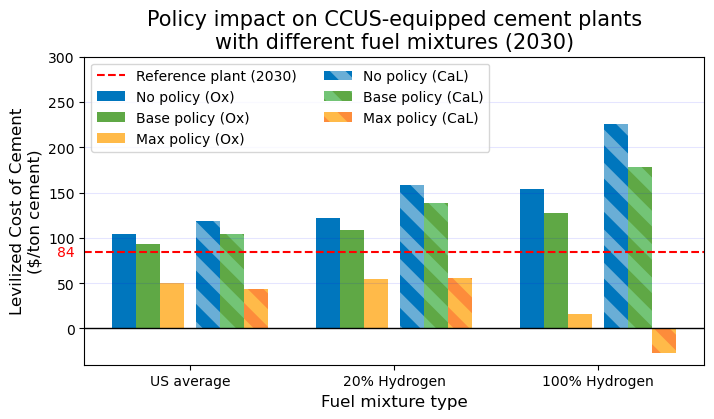

In [32]:
c_2030 = filter_data(c, ['2030'])
c_2030_grid = filter_data(c_2030, ['off-grid'])

c_US = filter_data_not(c_2030_grid, ['C4','C5'])
c_US_oxy = filter_data(c_US, ['Oxyfuel'])
c_US_cal = filter_data(c_US, ['CaL'])

c_C4 = filter_data(c_2030, ['off-grid','C4'])
c_C4_oxy = filter_data(c_C4, ['Oxyfuel'])
c_C4_cal = filter_data(c_C4, ['CaL'])

c_C5 = filter_data(c_2030, ['off-grid','C5'])
c_C5_oxy = filter_data(c_C5, ['Oxyfuel'])
c_C5_cal = filter_data(c_C5, ['CaL'])

# config graph
bar_width = 0.1
group_labels = ['US average', '20% Hydrogen', '100% Hydrogen']
group_space = 0.2
color_labels = ['No policy (Ox)', 'Base policy (Ox)', 'Max policy (Ox)', 'No policy (CaL)', 'Base policy (CaL)', 'Max policy (CaL)']

# Data for each subgroup in d1 (US average)
d1 = {
    "Oxyfuel": list(c_US_oxy['Unnamed: 2'].values[:3]),
    "CaL (tail-end)": list(c_US_cal['Unnamed: 2'].values[:3]),
}

# Data for each subgroup in d2 (C4)
d2 = {
    "Oxyfuel": list(c_C4_oxy['Unnamed: 2'].values[:3]),
    "CaL (tail-end)": list(c_C4_cal['Unnamed: 2'].values[:3]),
}

# Data for each subgroup in d3 (C5)
d3 = {
    "Oxyfuel": list(c_C5_oxy['Unnamed: 2'].values[:3]),
    "CaL (tail-end)": list(c_C5_cal['Unnamed: 2'].values[:3]),
}

x = np.arange(0, 4.5, 1.7)
width = 0.2
y1 = [round(d["Oxyfuel"][0]) for d in [d1, d2, d3]]
y2 = [round(d["Oxyfuel"][1]) for d in [d1, d2, d3]]
y3 = [round(d["Oxyfuel"][2]) for d in [d1, d2, d3]]
y4 = [round(d["CaL (tail-end)"][0]) for d in [d1, d2, d3]]
y5 = [round(d["CaL (tail-end)"][1]) for d in [d1, d2, d3]]
y6 = [round(d["CaL (tail-end)"][2]) for d in [d1, d2, d3]]

# begin plotting bars
fig, ax = plt.subplots()

bars = []
bars += ax.bar(x-0.55, y1, width, label=color_labels[0], color = colorhash[0])
bars += ax.bar(x-0.35, y2, width, label=color_labels[1], color = colorhash[1])
bars += ax.bar(x-0.15, y3, width, label=color_labels[2], color=colorhash[2])

plt.rcParams['hatch.linewidth'] = 8

cmap = plt.get_cmap('Blues')
plt.rcParams['hatch.color'] = cmap(0.5)
bars += ax.bar(x+0.15, y4, width, label=color_labels[3], color = colorhash[0], hatch='\\')
cmap = plt.get_cmap('Greens')
plt.rcParams['hatch.color'] = cmap(0.5)
bars += ax.bar(x+0.35, y5, width, label=color_labels[4], color = colorhash[1], hatch='\\')
cmap = plt.get_cmap('Oranges')
plt.rcParams['hatch.color'] = cmap(0.5)
bars += ax.bar(x+0.55, y6, width, label=color_labels[5], color = colorhash[2], hatch='\\')

ax.set_xticks(x, group_labels);
ax.set_xlabel('Fuel mixture type', fontsize=12)
ax.set_ylabel('Levilized Cost of Cement\n($/ton cement)', fontsize=12)
ax.set_ylim(-40, 300)

# add reference costs
ref_2020 = 81.85
ref_2030 = 84.19

plt.axhline(y=ref_2030, color='r', linestyle='--', label='Reference plant (2030)');
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,ref_2030, "{:.0f}".format(ref_2030), color="red", transform=trans, 
        ha="right", va="center")

plt.axhline(y=0, color='black', linestyle='-', lw=1);
plt.legend(ncol=2);
plt.grid(visible=True, which='major', axis='y', color='b', alpha=0.1)
plt.title('Policy impact on CCUS-equipped cement plants\nwith different fuel mixtures (2030)', fontsize=15);

fig.set_figwidth(8)
fig.set_figheight(4)
        
plt.savefig(os.path.join(outloc, 'policy_2030.png'), dpi=600, bbox_inches='tight')
# Show the plot
plt.show()

### 2020, no steel coupling

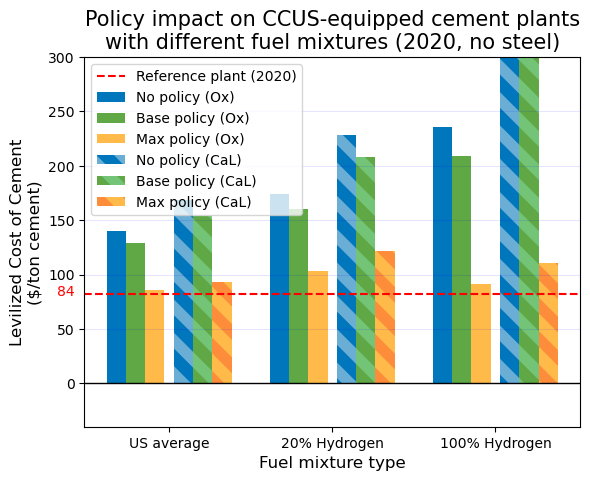

In [33]:
### import data
rundir = os.getcwd()

filename = 'CEMENT_BATCH_policy_no_steel_coupling_03-08-2023_10.44.36.csv'
inloc = os.path.join(rundir, 'outputs\\keep', filename)
outloc = os.path.join(rundir, 'outputs\\plots')

f = pd.read_csv(inloc)
f.drop('Unnamed: 0', axis=1, inplace=True)

c = f.iloc[:,:2]
c['Unnamed: 2'].apply(round)
f = f.iloc[:, 2:]
f['Unnamed: 4'].apply(round)


c_2020 = filter_data(c, ['2020'])
c_2020_grid = filter_data(c_2020, ['off-grid'])

c_US = filter_data_not(c_2020_grid, ['C4','C5'])
c_US_oxy = filter_data(c_US, ['Oxyfuel'])
c_US_cal = filter_data(c_US, ['CaL'])

c_C4 = filter_data(c_2020, ['off-grid','C4'])
c_C4_oxy = filter_data(c_C4, ['Oxyfuel'])
c_C4_cal = filter_data(c_C4, ['CaL'])

c_C5 = filter_data(c_2020, ['off-grid','C5'])
c_C5_oxy = filter_data(c_C5, ['Oxyfuel'])
c_C5_cal = filter_data(c_C5, ['CaL'])

# config graph
bar_width = 0.1
group_labels = ['US average', '20% Hydrogen', '100% Hydrogen']
group_space = 0.2
color_labels = ['No policy (Ox)', 'Base policy (Ox)', 'Max policy (Ox)', 'No policy (CaL)', 'Base policy (CaL)', 'Max policy (CaL)']

# Data for each subgroup in d1 (US average)
d1 = {
    "Oxyfuel": list(c_US_oxy['Unnamed: 2'].values[:3]),
    "CaL (tail-end)": list(c_US_cal['Unnamed: 2'].values[:3]),
}

# Data for each subgroup in d2 (C4)
d2 = {
    "Oxyfuel": list(c_C4_oxy['Unnamed: 2'].values[:3]),
    "CaL (tail-end)": list(c_C4_cal['Unnamed: 2'].values[:3]),
}

# Data for each subgroup in d3 (C5)
d3 = {
    "Oxyfuel": list(c_C5_oxy['Unnamed: 2'].values[:3]),
    "CaL (tail-end)": list(c_C5_cal['Unnamed: 2'].values[:3]),
}

x = np.arange(0, 4.5, 1.7)
width = 0.2
y1 = [round(d["Oxyfuel"][0]) for d in [d1, d2, d3]]
y2 = [round(d["Oxyfuel"][1]) for d in [d1, d2, d3]]
y3 = [round(d["Oxyfuel"][2]) for d in [d1, d2, d3]]
y4 = [round(d["CaL (tail-end)"][0]) for d in [d1, d2, d3]]
y5 = [round(d["CaL (tail-end)"][1]) for d in [d1, d2, d3]]
y6 = [round(d["CaL (tail-end)"][2]) for d in [d1, d2, d3]]

# begin plotting bars
fig, ax = plt.subplots()

bars = []
bars += ax.bar(x-0.55, y1, width, label=color_labels[0], color = colorhash[0])
bars += ax.bar(x-0.35, y2, width, label=color_labels[1], color = colorhash[1])
bars += ax.bar(x-0.15, y3, width, label=color_labels[2], color=colorhash[2])

plt.rcParams['hatch.linewidth'] = 8

cmap = plt.get_cmap('Blues')
plt.rcParams['hatch.color'] = cmap(0.5)
bars += ax.bar(x+0.15, y4, width, label=color_labels[3], color = colorhash[0], hatch='\\')
cmap = plt.get_cmap('Greens')
plt.rcParams['hatch.color'] = cmap(0.5)
bars += ax.bar(x+0.35, y5, width, label=color_labels[4], color = colorhash[1], hatch='\\')
cmap = plt.get_cmap('Oranges')
plt.rcParams['hatch.color'] = cmap(0.5)
bars += ax.bar(x+0.55, y6, width, label=color_labels[5], color = colorhash[2], hatch='\\')

ax.set_xticks(x, group_labels);
ax.set_xlabel('Fuel mixture type', fontsize=12)
ax.set_ylabel('Levilized Cost of Cement\n($/ton cement)', fontsize=12)
ax.set_ylim(-40, 300)

# add reference costs
ref_2020 = 81.85
ref_2030 = 84.19

plt.axhline(y=ref_2020, color='r', linestyle='--', label='Reference plant (2020)');
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,ref_2030, "{:.0f}".format(ref_2030), color="red", transform=trans, 
        ha="right", va="center")

plt.axhline(y=0, color='black', linestyle='-', lw=1);
plt.legend();
plt.grid(visible=True, which='major', axis='y', color='b', alpha=0.1)
plt.title('Policy impact on CCUS-equipped cement plants\nwith different fuel mixtures (2020, no steel)', fontsize=15);
        
plt.savefig(os.path.join(outloc, 'policy_2020_nosteel.png'), dpi=600, bbox_inches='tight')
# Show the plot
plt.show()

### 2030, no steel coupling 

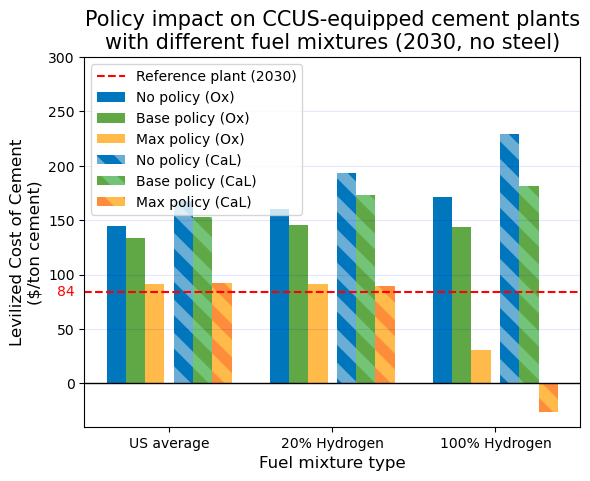

In [34]:
### import data
rundir = os.getcwd()

filename = 'CEMENT_BATCH_policy_no_steel_coupling_2030_03-08-2023_10.58.58.csv'
inloc = os.path.join(rundir, 'outputs\\keep', filename)
outloc = os.path.join(rundir, 'outputs\\plots')

f = pd.read_csv(inloc)
f.drop('Unnamed: 0', axis=1, inplace=True)

c = f.iloc[:,:2]
c['Unnamed: 2'].apply(round)
f = f.iloc[:, 2:]
f['Unnamed: 4'].apply(round)


c_2030 = filter_data(c, ['2030'])
c_2030_grid = filter_data(c_2030, ['off-grid'])

c_US = filter_data_not(c_2030_grid, ['C4','C5'])
c_US_oxy = filter_data(c_US, ['Oxyfuel'])
c_US_cal = filter_data(c_US, ['CaL'])

c_C4 = filter_data(c_2030, ['off-grid','C4'])
c_C4_oxy = filter_data(c_C4, ['Oxyfuel'])
c_C4_cal = filter_data(c_C4, ['CaL'])

c_C5 = filter_data(c_2030, ['off-grid','C5'])
c_C5_oxy = filter_data(c_C5, ['Oxyfuel'])
c_C5_cal = filter_data(c_C5, ['CaL'])

# config graph
bar_width = 0.1
group_labels = ['US average', '20% Hydrogen', '100% Hydrogen']
group_space = 0.2
color_labels = ['No policy (Ox)', 'Base policy (Ox)', 'Max policy (Ox)', 'No policy (CaL)', 'Base policy (CaL)', 'Max policy (CaL)']

# Data for each subgroup in d1 (US average)
d1 = {
    "Oxyfuel": list(c_US_oxy['Unnamed: 2'].values[:3]),
    "CaL (tail-end)": list(c_US_cal['Unnamed: 2'].values[:3]),
}

# Data for each subgroup in d2 (C4)
d2 = {
    "Oxyfuel": list(c_C4_oxy['Unnamed: 2'].values[:3]),
    "CaL (tail-end)": list(c_C4_cal['Unnamed: 2'].values[:3]),
}

# Data for each subgroup in d3 (C5)
d3 = {
    "Oxyfuel": list(c_C5_oxy['Unnamed: 2'].values[:3]),
    "CaL (tail-end)": list(c_C5_cal['Unnamed: 2'].values[:3]),
}

x = np.arange(0, 4.5, 1.7)
width = 0.2
y1 = [round(d["Oxyfuel"][0]) for d in [d1, d2, d3]]
y2 = [round(d["Oxyfuel"][1]) for d in [d1, d2, d3]]
y3 = [round(d["Oxyfuel"][2]) for d in [d1, d2, d3]]
y4 = [round(d["CaL (tail-end)"][0]) for d in [d1, d2, d3]]
y5 = [round(d["CaL (tail-end)"][1]) for d in [d1, d2, d3]]
y6 = [round(d["CaL (tail-end)"][2]) for d in [d1, d2, d3]]

# begin plotting bars
fig, ax = plt.subplots()

bars = []
bars += ax.bar(x-0.55, y1, width, label=color_labels[0], color = colorhash[0])
bars += ax.bar(x-0.35, y2, width, label=color_labels[1], color = colorhash[1])
bars += ax.bar(x-0.15, y3, width, label=color_labels[2], color=colorhash[2])

plt.rcParams['hatch.linewidth'] = 8

cmap = plt.get_cmap('Blues')
plt.rcParams['hatch.color'] = cmap(0.5)
bars += ax.bar(x+0.15, y4, width, label=color_labels[3], color = colorhash[0], hatch='\\')
cmap = plt.get_cmap('Greens')
plt.rcParams['hatch.color'] = cmap(0.5)
bars += ax.bar(x+0.35, y5, width, label=color_labels[4], color = colorhash[1], hatch='\\')
cmap = plt.get_cmap('Oranges')
plt.rcParams['hatch.color'] = cmap(0.5)
bars += ax.bar(x+0.55, y6, width, label=color_labels[5], color = colorhash[2], hatch='\\')

ax.set_xticks(x, group_labels);
ax.set_xlabel('Fuel mixture type', fontsize=12)
ax.set_ylabel('Levilized Cost of Cement\n($/ton cement)', fontsize=12)
ax.set_ylim(-40, 300)

# add reference costs
ref_2020 = 81.85
ref_2030 = 84.19

plt.axhline(y=ref_2030, color='r', linestyle='--', label='Reference plant (2030)');
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,ref_2030, "{:.0f}".format(ref_2030), color="red", transform=trans, 
        ha="right", va="center")

plt.axhline(y=0, color='black', linestyle='-', lw=1);
plt.legend();
plt.grid(visible=True, which='major', axis='y', color='b', alpha=0.1)
plt.title('Policy impact on CCUS-equipped cement plants\nwith different fuel mixtures (2030, no steel)', fontsize=15);
        
plt.savefig(os.path.join(outloc, 'policy_2030_nosteel.png'), dpi=600, bbox_inches='tight')
# Show the plot
plt.show()

### 2020, off-grid, post bug

NOTE this was because there was a bug in the LCA for emissions, wanted to see if there was any change in the cost results. Luckly, there doesn't seem to be any huge differences, so sticking with the original off-grid plots for now

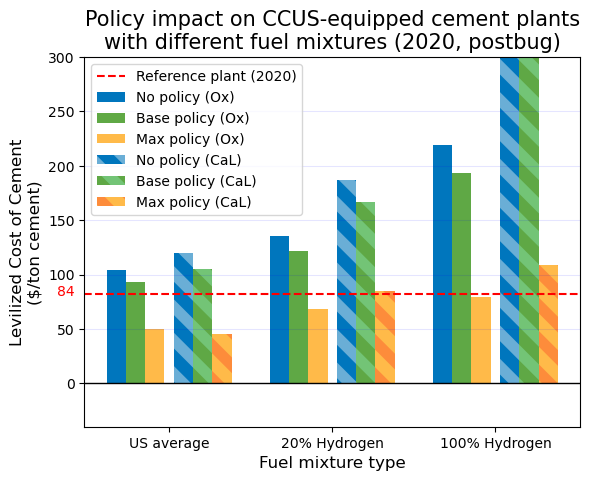

In [35]:
### import data
rundir = os.getcwd()

filename = 'CEMENT_BATCH_big_batch_off-grid_postbug_03-08-2023_13.34.07.csv'
inloc = os.path.join(rundir, 'outputs\\keep', filename)
outloc = os.path.join(rundir, 'outputs\\plots')

f = pd.read_csv(inloc)
f.drop('Unnamed: 0', axis=1, inplace=True)

c = f.iloc[:,:2]
c['Unnamed: 2'].apply(round)
f = f.iloc[:, 2:]
f['Unnamed: 4'].apply(round)


c_2020 = filter_data(c, ['2020'])
c_2020_grid = filter_data(c_2020, ['off-grid'])

c_US = filter_data_not(c_2020_grid, ['C4','C5'])
c_US_oxy = filter_data(c_US, ['Oxyfuel'])
c_US_cal = filter_data(c_US, ['CaL'])

c_C4 = filter_data(c_2020, ['off-grid','C4'])
c_C4_oxy = filter_data(c_C4, ['Oxyfuel'])
c_C4_cal = filter_data(c_C4, ['CaL'])

c_C5 = filter_data(c_2020, ['off-grid','C5'])
c_C5_oxy = filter_data(c_C5, ['Oxyfuel'])
c_C5_cal = filter_data(c_C5, ['CaL'])

# config graph
bar_width = 0.1
group_labels = ['US average', '20% Hydrogen', '100% Hydrogen']
group_space = 0.2
color_labels = ['No policy (Ox)', 'Base policy (Ox)', 'Max policy (Ox)', 'No policy (CaL)', 'Base policy (CaL)', 'Max policy (CaL)']

# Data for each subgroup in d1 (US average)
d1 = {
    "Oxyfuel": list(c_US_oxy['Unnamed: 2'].values[:3]),
    "CaL (tail-end)": list(c_US_cal['Unnamed: 2'].values[:3]),
}

# Data for each subgroup in d2 (C4)
d2 = {
    "Oxyfuel": list(c_C4_oxy['Unnamed: 2'].values[:3]),
    "CaL (tail-end)": list(c_C4_cal['Unnamed: 2'].values[:3]),
}

# Data for each subgroup in d3 (C5)
d3 = {
    "Oxyfuel": list(c_C5_oxy['Unnamed: 2'].values[:3]),
    "CaL (tail-end)": list(c_C5_cal['Unnamed: 2'].values[:3]),
}

x = np.arange(0, 4.5, 1.7)
width = 0.2
y1 = [round(d["Oxyfuel"][0]) for d in [d1, d2, d3]]
y2 = [round(d["Oxyfuel"][1]) for d in [d1, d2, d3]]
y3 = [round(d["Oxyfuel"][2]) for d in [d1, d2, d3]]
y4 = [round(d["CaL (tail-end)"][0]) for d in [d1, d2, d3]]
y5 = [round(d["CaL (tail-end)"][1]) for d in [d1, d2, d3]]
y6 = [round(d["CaL (tail-end)"][2]) for d in [d1, d2, d3]]

# begin plotting bars
fig, ax = plt.subplots()

bars = []
bars += ax.bar(x-0.55, y1, width, label=color_labels[0], color = colorhash[0])
bars += ax.bar(x-0.35, y2, width, label=color_labels[1], color = colorhash[1])
bars += ax.bar(x-0.15, y3, width, label=color_labels[2], color=colorhash[2])

plt.rcParams['hatch.linewidth'] = 8

cmap = plt.get_cmap('Blues')
plt.rcParams['hatch.color'] = cmap(0.5)
bars += ax.bar(x+0.15, y4, width, label=color_labels[3], color = colorhash[0], hatch='\\')
cmap = plt.get_cmap('Greens')
plt.rcParams['hatch.color'] = cmap(0.5)
bars += ax.bar(x+0.35, y5, width, label=color_labels[4], color = colorhash[1], hatch='\\')
cmap = plt.get_cmap('Oranges')
plt.rcParams['hatch.color'] = cmap(0.5)
bars += ax.bar(x+0.55, y6, width, label=color_labels[5], color = colorhash[2], hatch='\\')

ax.set_xticks(x, group_labels);
ax.set_xlabel('Fuel mixture type', fontsize=12)
ax.set_ylabel('Levilized Cost of Cement\n($/ton cement)', fontsize=12)
ax.set_ylim(-40, 300)

# add reference costs
ref_2020 = 81.85
ref_2030 = 84.19

plt.axhline(y=ref_2020, color='r', linestyle='--', label='Reference plant (2020)');
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,ref_2030, "{:.0f}".format(ref_2030), color="red", transform=trans, 
        ha="right", va="center")

plt.axhline(y=0, color='black', linestyle='-', lw=1);
plt.legend();
plt.grid(visible=True, which='major', axis='y', color='b', alpha=0.1)
plt.title('Policy impact on CCUS-equipped cement plants\nwith different fuel mixtures (2020, postbug)', fontsize=15);
        
plt.savefig(os.path.join(outloc, 'policy_2020_postbug.png'), dpi=600, bbox_inches='tight')
# Show the plot
plt.show()

### 2030, off-grid, post bug

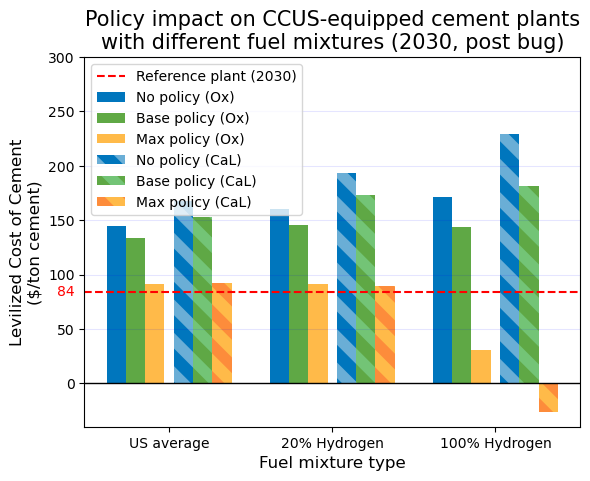

In [36]:
### import data
rundir = os.getcwd()

filename = 'CEMENT_BATCH_policy_no_steel_coupling_2030_03-08-2023_10.58.58.csv'
inloc = os.path.join(rundir, 'outputs\\keep', filename)
outloc = os.path.join(rundir, 'outputs\\plots')

f = pd.read_csv(inloc)
f.drop('Unnamed: 0', axis=1, inplace=True)

c = f.iloc[:,:2]
c['Unnamed: 2'].apply(round)
f = f.iloc[:, 2:]
f['Unnamed: 4'].apply(round)


c_2030 = filter_data(c, ['2030'])
c_2030_grid = filter_data(c_2030, ['off-grid'])

c_US = filter_data_not(c_2030_grid, ['C4','C5'])
c_US_oxy = filter_data(c_US, ['Oxyfuel'])
c_US_cal = filter_data(c_US, ['CaL'])

c_C4 = filter_data(c_2030, ['off-grid','C4'])
c_C4_oxy = filter_data(c_C4, ['Oxyfuel'])
c_C4_cal = filter_data(c_C4, ['CaL'])

c_C5 = filter_data(c_2030, ['off-grid','C5'])
c_C5_oxy = filter_data(c_C5, ['Oxyfuel'])
c_C5_cal = filter_data(c_C5, ['CaL'])

# config graph
bar_width = 0.1
group_labels = ['US average', '20% Hydrogen', '100% Hydrogen']
group_space = 0.2
color_labels = ['No policy (Ox)', 'Base policy (Ox)', 'Max policy (Ox)', 'No policy (CaL)', 'Base policy (CaL)', 'Max policy (CaL)']

# Data for each subgroup in d1 (US average)
d1 = {
    "Oxyfuel": list(c_US_oxy['Unnamed: 2'].values[:3]),
    "CaL (tail-end)": list(c_US_cal['Unnamed: 2'].values[:3]),
}

# Data for each subgroup in d2 (C4)
d2 = {
    "Oxyfuel": list(c_C4_oxy['Unnamed: 2'].values[:3]),
    "CaL (tail-end)": list(c_C4_cal['Unnamed: 2'].values[:3]),
}

# Data for each subgroup in d3 (C5)
d3 = {
    "Oxyfuel": list(c_C5_oxy['Unnamed: 2'].values[:3]),
    "CaL (tail-end)": list(c_C5_cal['Unnamed: 2'].values[:3]),
}

x = np.arange(0, 4.5, 1.7)
width = 0.2
y1 = [round(d["Oxyfuel"][0]) for d in [d1, d2, d3]]
y2 = [round(d["Oxyfuel"][1]) for d in [d1, d2, d3]]
y3 = [round(d["Oxyfuel"][2]) for d in [d1, d2, d3]]
y4 = [round(d["CaL (tail-end)"][0]) for d in [d1, d2, d3]]
y5 = [round(d["CaL (tail-end)"][1]) for d in [d1, d2, d3]]
y6 = [round(d["CaL (tail-end)"][2]) for d in [d1, d2, d3]]

# begin plotting bars
fig, ax = plt.subplots()

bars = []
bars += ax.bar(x-0.55, y1, width, label=color_labels[0], color = colorhash[0])
bars += ax.bar(x-0.35, y2, width, label=color_labels[1], color = colorhash[1])
bars += ax.bar(x-0.15, y3, width, label=color_labels[2], color=colorhash[2])

plt.rcParams['hatch.linewidth'] = 8

cmap = plt.get_cmap('Blues')
plt.rcParams['hatch.color'] = cmap(0.5)
bars += ax.bar(x+0.15, y4, width, label=color_labels[3], color = colorhash[0], hatch='\\')
cmap = plt.get_cmap('Greens')
plt.rcParams['hatch.color'] = cmap(0.5)
bars += ax.bar(x+0.35, y5, width, label=color_labels[4], color = colorhash[1], hatch='\\')
cmap = plt.get_cmap('Oranges')
plt.rcParams['hatch.color'] = cmap(0.5)
bars += ax.bar(x+0.55, y6, width, label=color_labels[5], color = colorhash[2], hatch='\\')

ax.set_xticks(x, group_labels);
ax.set_xlabel('Fuel mixture type', fontsize=12)
ax.set_ylabel('Levilized Cost of Cement\n($/ton cement)', fontsize=12)
ax.set_ylim(-40, 300)

# add reference costs
ref_2020 = 81.85
ref_2030 = 84.19

plt.axhline(y=ref_2030, color='r', linestyle='--', label='Reference plant (2030)');
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,ref_2030, "{:.0f}".format(ref_2030), color="red", transform=trans, 
        ha="right", va="center")

plt.axhline(y=0, color='black', linestyle='-', lw=1);
plt.legend();
plt.grid(visible=True, which='major', axis='y', color='b', alpha=0.1)
plt.title('Policy impact on CCUS-equipped cement plants\nwith different fuel mixtures (2030, post bug)', fontsize=15);
        
plt.savefig(os.path.join(outloc, 'policy_2030_postbug.png'), dpi=600, bbox_inches='tight')
# Show the plot
plt.show()

## emissions with CCUS (2020-2030, should be relatively similar)

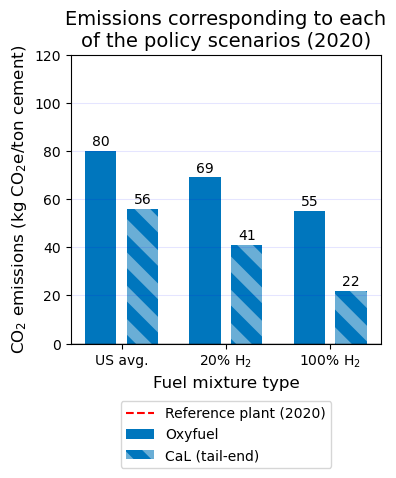

In [37]:
### import data
rundir = os.getcwd()

filename = 'CEMENT_BATCH_emissions_for_policy_comp_04-08-2023_10.40.21.csv'
inloc = os.path.join(rundir, 'outputs\\keep', filename)
outloc = os.path.join(rundir, 'outputs\\plots')

f = pd.read_csv(inloc)
f.drop('Unnamed: 0', axis=1, inplace=True)

c = f.iloc[:,:2]
c['Unnamed: 2'].apply(round)
e = f.iloc[:, 2:]
e['Unnamed: 4'].apply(round)


e_2020 = filter_data(e, ['2020'])

e_US = filter_data_not(e_2020, ['C4','C5'])
e_US_oxy = filter_data(e_US, ['Oxyfuel'])
e_US_cal = filter_data(e_US, ['CaL'])

e_C4 = filter_data(e_2020, ['off-grid','C4'])
e_C4_oxy = filter_data(e_C4, ['Oxyfuel'])
e_C4_cal = filter_data(e_C4, ['CaL'])

e_C5 = filter_data(e_2020, ['off-grid','C5'])
e_C5_oxy = filter_data(e_C5, ['Oxyfuel'])
e_C5_cal = filter_data(e_C5, ['CaL'])

# config graph
bar_width = 0.1
group_labels = ['US avg.', '20% H$_2$', '100% H$_2$']
group_space = 0.2
color_labels = ['Oxyfuel', 'Base policy (Ox)', 'Max policy (Ox)', 'CaL (tail-end)', 'Base policy (CaL)', 'Max policy (CaL)']

# Data for each subgroup in d1 (US average)
d1 = {
    "Oxyfuel": list(e_US_oxy['Unnamed: 4'].values),
    "CaL (tail-end)": list(e_US_cal['Unnamed: 4'].values),
}

# Data for each subgroup in d2 (C4)
d2 = {
    "Oxyfuel": list(e_C4_oxy['Unnamed: 4'].values),
    "CaL (tail-end)": list(e_C4_cal['Unnamed: 4'].values),
}

# Data for each subgroup in d3 (C5)
d3 = {
    "Oxyfuel": list(e_C5_oxy['Unnamed: 4'].values),
    "CaL (tail-end)": list(e_C5_cal['Unnamed: 4'].values),
}

x = np.arange(0, 1.5, 0.5)
width = 0.15
y1 = [round(d["Oxyfuel"][0]) for d in [d1, d2, d3]]
# y2 = [round(d["Oxyfuel"][1]) for d in [d1, d2, d3]]
# y3 = [round(d["Oxyfuel"][2]) for d in [d1, d2, d3]]
y4 = [round(d["CaL (tail-end)"][0]) for d in [d1, d2, d3]]
# y5 = [round(d["CaL (tail-end)"][1]) for d in [d1, d2, d3]]
# y6 = [round(d["CaL (tail-end)"][2]) for d in [d1, d2, d3]]

for v, i in zip(cost, x):
    ax2.text(1.5 - 4*bar_width/2 + 2*(bar_width/2)*i, v + 1, str(v), ha='center', va='bottom', color='black', fontsize=12)
    
# begin plotting bars
fig, ax = plt.subplots()

bars = []
bars += ax.bar(x-0.1, y1, width, label=color_labels[0], color = colorhash[0])

for i, y in zip(x,y1):
    ax.text(i-0.1, y+1, str(y), ha='center', va='bottom', color='black', fontsize=10)

for i, y in zip(x,y4):
    ax.text(i+0.1, y+1, str(y), ha='center', va='bottom', color='black', fontsize=10)

# bars += ax.bar(x-0.35, y2, width, label=color_labels[1], color = colorhash[1])
# bars += ax.bar(x-0.15, y3, width, label=color_labels[2], color=colorhash[2])

plt.rcParams['hatch.linewidth'] = 8

cmap = plt.get_cmap('Blues')
plt.rcParams['hatch.color'] = cmap(0.5)
bars += ax.bar(x+0.1, y4, width, label=color_labels[3], color = colorhash[0], hatch='\\')
# cmap = plt.get_cmap('Greens')
# plt.rcParams['hatch.color'] = cmap(0.5)
# bars += ax.bar(x+0.35, y5, width, label=color_labels[4], color = colorhash[1], hatch='\\')
# cmap = plt.get_cmap('Oranges')
# plt.rcParams['hatch.color'] = cmap(0.5)
# bars += ax.bar(x+0.55, y6, width, label=color_labels[5], color = colorhash[2], hatch='\\')

ax.set_xticks(x, group_labels);
ax.set_xlabel('Fuel mixture type', fontsize=12)
ax.set_ylabel('CO$_2$ emissions (kg CO$_2$e/ton cement)', fontsize=12)
ax.set_ylim(0,120)

plt.axhline(y=820, color='r', linestyle='--', label='Reference plant (2020)');
# trans = transforms.blended_transform_factory(
#     ax.get_yticklabels()[0].get_transform(), ax.transData)
# ax.text(0,820, "{:.0f}".format(820), color="red", transform=trans, 
#         ha="right", va="center")
# ax.set_yticks([0,100,200,300,400,500,600,700,775])

plt.axhline(y=0, color='black', linestyle='-', lw=1);
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175), ncol=1);
plt.grid(visible=True, which='major', axis='y', color='b', alpha=0.1)
plt.title('Emissions corresponding to each\nof the policy scenarios (2020)', fontsize=14);

fig.set_figwidth(4)
fig.set_figheight(3.75)



plt.savefig(os.path.join(outloc, 'policy emissions.png'), dpi=600, bbox_inches='tight')
# Show the plot
plt.show()